## 一个小练习<br>
爬取百度百科的内容，点开链接，爬取下一个百科网站……
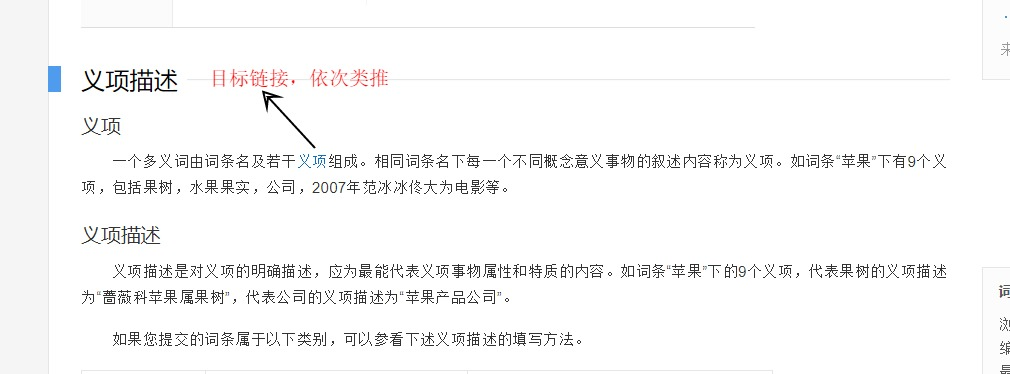

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
link=["/item/%E7%BD%91%E7%BB%9C%E7%88%AC%E8%99%AB/5162711#5_1"]
base="https://baike.baidu.com"
while len(link)<=21:
    html=urlopen(base+link[-1] ).read().decode('utf-8') #打开网页
    soup=BeautifulSoup(html,features='lxml')
    #正则表达式匹配href
    next_link=soup.find('a',target=re.compile('_blank'),href=re.compile('/item/%.*?'))
    if next_link==None: break
    link.append(next_link['href'])
print(base+link[-1])
#example target<a target="_blank" href="/item/%E4%B8%87%E7%BB%B4%E7%BD%91">万维网</a>

https://baike.baidu.com/item/%E7%99%BE%E5%BA%A6%E7%99%BE%E7%A7%91


# requests<br>
[requests中文官网](http://cn.python-requests.org/zh_CN/latest/)<br>
requests能够极方便地进行http操作，主要分两部分:

**1.requests.get(url, params=None, kwargs) **<br>
_get_顾名思义是获取的意思，它是静止的，普遍的。
Requests 允许使用 params 关键字参数，以一个字符串字典来提供这些参数。举例来说，如果你想传递 key1=value1 和 key2=value2 到 httpbin.org/get <br>
payload = {'key1': 'value1', 'key2': 'value2'} <br>
r = requests.get("http://httpbin.org/get", params=payload) <br>

In [11]:
import requests
import webbrowser
payload={'wd':'东软'}
r=requests.get('https://www.baidu.com/s',params=payload)
r.encoding='utf-8'
print(r.text)
webbrowser.open(r.url)

<html>
<head>
	<script>
		location.replace(location.href.replace("https://","http://"));
	</script>
</head>
<body>
	<noscript><meta http-equiv="refresh" content="0;url=http://www.baidu.com/"></noscript>
</body>
</html>


True

**2.requests.post(url, data=None, json=None)**<br>
_post_顾名思义是申请的意思，是交互的，定制的。<br>
用户提供交post给网站，网站根据所得显示新的网页。**注意 post **里面的 url, 不是我们填表时的 url， 而是要把 Form 信息提交去的目标网页。即Request URL
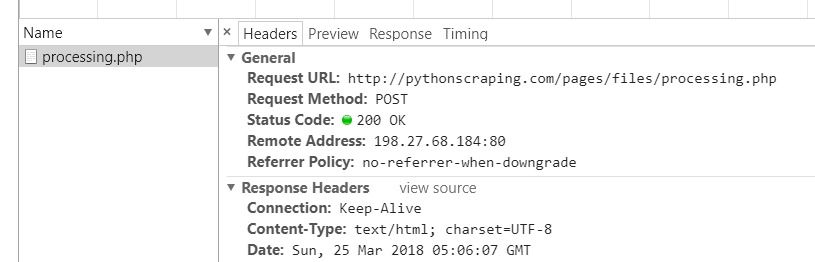
requests.post工作的一般格式<br>
payload = {'key1': 'value1', 'key2': 'value2'}<br>
r = requests.post("http://httpbin.org/post", data=payload)<br>

还可以为 data 参数传入一个_元组_列表。在表单中多个元素使用同一 key 的时候，这种方式尤其有效：<br>

payload = (('key1', 'value1'), ('key1', 'value2'))<br>
r = requests.post('http://httpbin.org/post', data=payload)<br>
print(r.text)<br>
结果：<br>
  "form": {<br>
    "key1": [<br>
      "value1",<br>
      "value2"<br>
    ]<br>
  }<br>

In [4]:
#练习网址http://pythonscraping.com/pages/files/form.html
#目标网址http://pythonscraping.com/pages/files/processing.php
import requests
import webbrowser
name={'firstname':'wang','lastname':'xy'}
r=requests.post('http://pythonscraping.com/pages/files/processing.php',data=name)
print(r.text)

Hello there, wang xy!


## requests上传图片<br>
用法和注意事项同 data <br>
file={'keyword':file}<br>
requests.post(URL,files=file)

In [3]:
#注意文件路径包含中文时可能会出错,用'E:\'指引地址
import requests
uploadfile={'uploadFile':open('E:/files.jpg','rb')}
R=requests.post('http://pythonscraping.com/files/processing2.php',files=uploadfile)
print(R.text)

The file files.jpg has been uploaded.


## Login登录<br>
直接登录 & 利用cookies<br>
注意到两次登录的**方式和网址**都不同.<br>
第一次是常规的 **post+post指向URL** 登录<br>
第二次是用 ***get cookies+cookies指向URL*** 登录
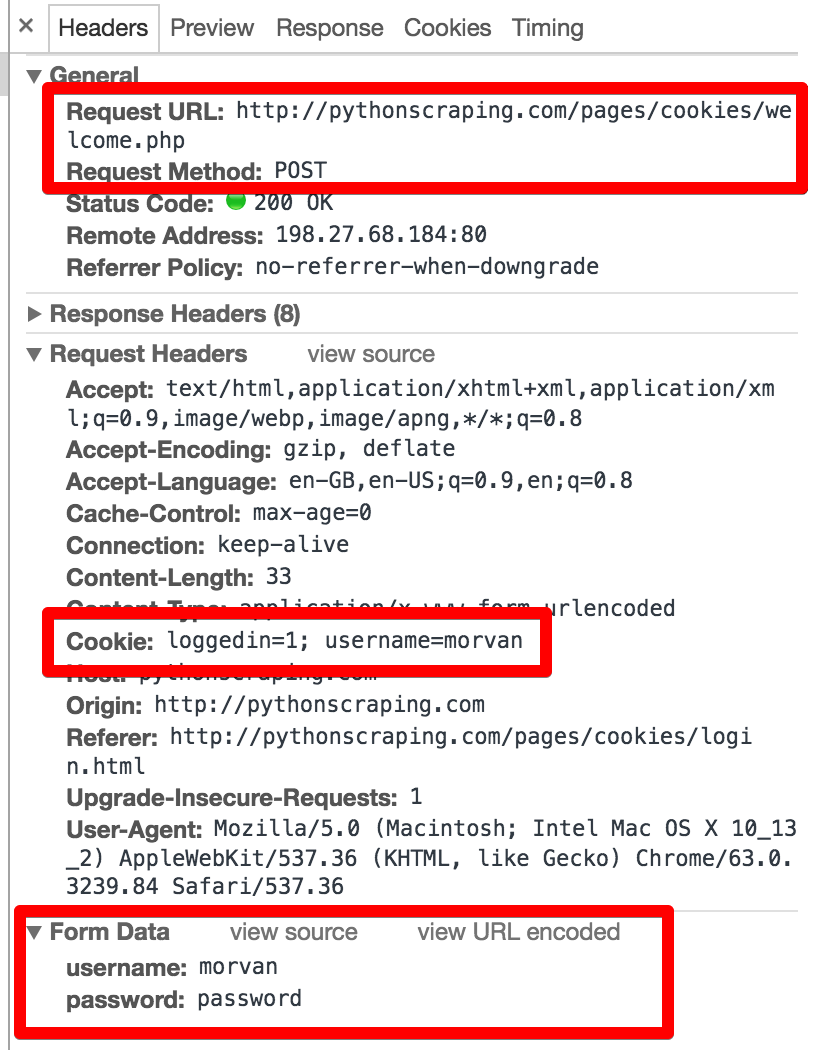
↑↑post requests URL
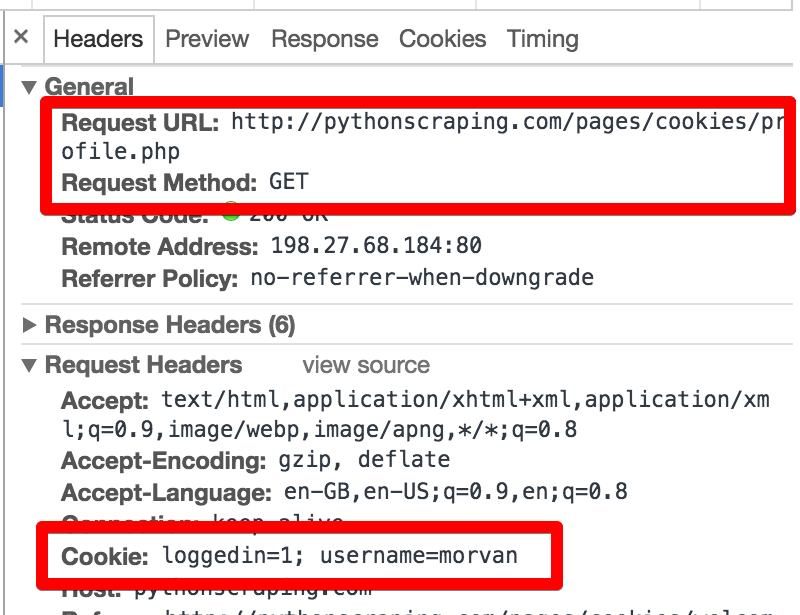
👆👆cookies requests URL

In [4]:
#post登录
payload = {'username': 'wxy', 'password': 'password'}
r = requests.post('http://pythonscraping.com/pages/cookies/welcome.php', data=payload)
print(r.cookies.get_dict())
#cookies登录，必须有cookies才能用此法
r = requests.get('http://pythonscraping.com/pages/cookies/profile.php', cookies=r.cookies)
print(r.text)
print('cookies的类型比较独特：',r.cookies)

{'loggedin': '1', 'username': 'wxy'}
Hey wxy! Looks like you're still logged into the site!
cookies的类型比较独特： <RequestsCookieJar[]>


### session登录<br>
大写**Session**对象可以方便地避免每次直接调用cookies<br>
大体上session和requests十分类似,登录的网址两次也是不同的<br>

In [11]:
import requests
#普通登录
payload={'username':'wxy','password':'password'}
session=requests.Session()
r=session.post('http://pythonscraping.com/pages/cookies/welcome.php',data=payload)
print(r.cookies.get_dict())
#session登录
r=session.get('http://pythonscraping.com/pages/cookies/profile.php')
print(r.text)

{'loggedin': '1', 'username': 'wxy'}
Hey wxy! Looks like you're still logged into the site!
